<a href="https://colab.research.google.com/github/NytKing/Loan_risk/blob/main/Loan_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today I will be trying to build a model that can predict if a person who is applying for loan is going to default or not. This model will be helpful for organizations to save revenue, and minimize cash burn. 

Firstly I will load the dataset, which is in github repository to goggle colab

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
loan_risk=pd.read_csv("https://raw.githubusercontent.com/NytKing/Laon_risk/main/credit_risk_dataset.csv")

In [ ]:
loan_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Now, as we can see from the above code that we have successfully imported the dataset from github, we need to explore the dataset.

In [ ]:
#checking number of rows and column of the dataset
loan_risk.shape

(32581, 12)

In [ ]:
#Checking for the types of data present in each column of the dataframe, string variables will be outputted as object
loan_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

When I observe the output of the preivous code I find that the target variable loan_status is in showhere in the middle of the dataset, I would like to switch it as the last column, for my convinience.








In [ ]:
#Initially, I will look at the columns in the df and will re-index them manually
loan_risk.columns
loan_risk = loan_risk.reindex(columns=['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length','loan_status'])

Now as we have rearranged the column we will see if the columns have been re-arranged


In [ ]:
loan_risk
# our df has been re-arranged!!

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


Since the columns are rearranged, Lets take a look at the outliers now.

In [ ]:
# to identify the outliers I see the summary of the dataset as a whole to make out which column might have outliers
loan_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Now as we can see, the age column and employment length column have outliers, as the max values for these columns are high and so I have assumned these two columns to have outliers and we need to remove them.

Let us now look how the object type variables in the datasets are behaving, i.e their distribution.

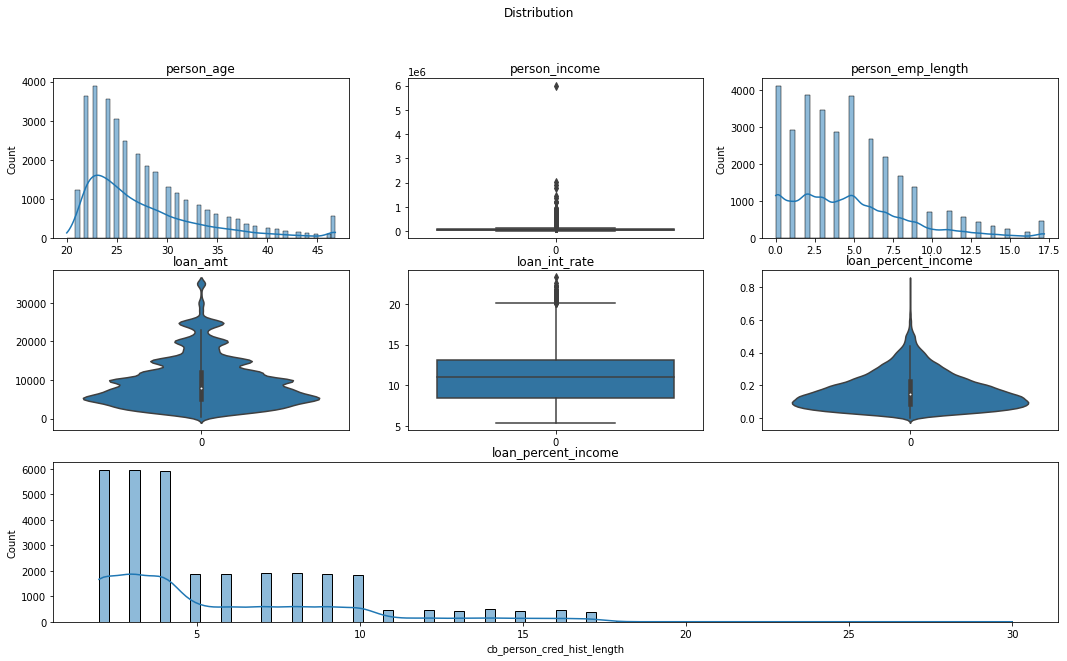

In [ ]:
fig=plt.figure(figsize=(18,10))

plt.subplot(331) 
plt.title("person_age")        
pa=sns.histplot(data=loan_risk["person_age"],kde=True);
pa.set_xlabel(None)

plt.subplot(332) 
plt.title("person_income")
sns.boxplot(data=loan_risk["person_income"]);

plt.subplot(333) 
plt.title("person_emp_length")
pel=sns.histplot(data=loan_risk["person_emp_length"],kde=True);
pel.set_xlabel(None)

plt.subplot(334) 
plt.title("loan_amt")
sns.violinplot(data=loan_risk["loan_amnt"]);

plt.subplot(335) 
plt.title("loan_int_rate")
sns.boxplot(data=loan_risk["loan_int_rate"]);

plt.subplot(336) 
plt.title("loan_percent_income")
sns.violinplot(data=loan_risk["loan_percent_income"]);

plt.subplot(313) 
plt.title("loan_percent_income")
sns.histplot(data=loan_risk["cb_person_cred_hist_length"],kde=True);

plt.suptitle("Distribution"); #supertitle
# I have dropped all the object dtypes and target variable

From the above distributions, we see that:
1. Most of the people who apply for loan range from 20 to 30 yrs
2. The income ranges from 0.1 to 0.2 million
3. Loan amount ranges from $10,000 to $20,000
4. Distributions of Person_age column and employment length look similar
5. Most of the interest rate falls between 8% to 14%
6. Loan_percent income has a peak at 1%

Also note that the distributions seem ot be skewed, we need to address this issue.

Variation of object type variables

In [ ]:
obj_type=loan_risk.select_dtypes(include='object').columns #only object type columns
obj_type

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

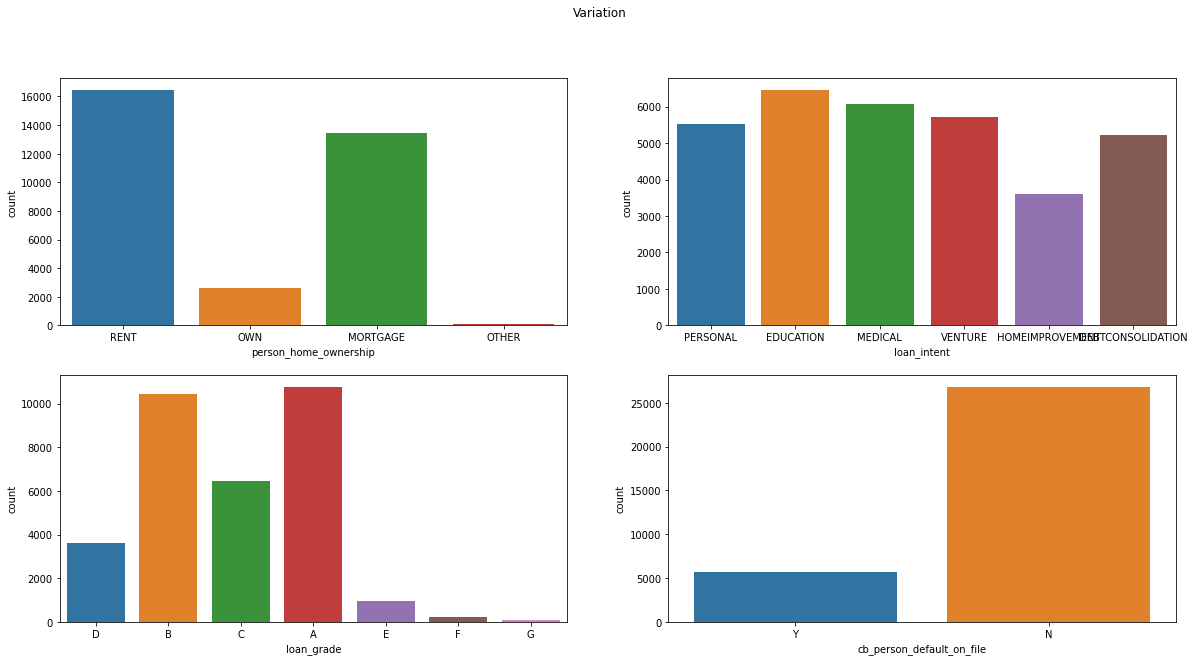

In [ ]:
fig1,axes1 = plt.subplots(2,2,figsize=(20,10))
fig1.suptitle("Variation")
sns.countplot(ax=axes1[0,0],x=loan_risk["person_home_ownership"],data=loan_risk);
sns.countplot(ax=axes1[0,1],x=loan_risk["loan_intent"],data=loan_risk);
sns.countplot(ax=axes1[1,0],x=loan_risk["loan_grade"],data=loan_risk);
sns.countplot(ax=axes1[1,1],x=loan_risk["cb_person_default_on_file"],data=loan_risk);

From the above 4 plots, we see that:

1. Most of the loan applicants reside in rented house
2. Loan intent seems to for personal reasons.
3. The loan grades are in the order A>B>C>D>E>F>G
4. Many loan applicants are defaulters on files




In Classificaton datasets, there are usually imbalance in the target variable, we are going to examine if it is the same with this dataset as well. Will be using pie-chart for this

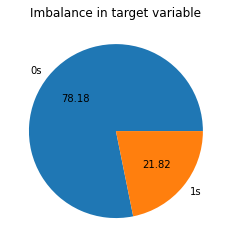

In [200]:
#loan_risk["loan_status"].value_counts(1) --> will give the percent of 0s and 1s in the target column
#I have used semicolon at the end to remove the text that appeears before the plot
plt.pie(loan_risk["loan_status"].value_counts(1),labels=["0s","1s"],autopct='%.2f');
plt.title("Imbalance in target variable");

We see that there is indeed imbalance in the target variable and we need to address it.

We shall now see the corelation between the variables

In [ ]:
#corelation 
loan_risk.corr().style.background_gradient(cmap="coolwarm").set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.00,0.17,0.16,0.05,0.01,-0.04,0.86,-0.02
person_income,0.17,1.00,0.13,0.27,0.00,-0.25,0.12,-0.14
person_emp_length,0.16,0.13,1.00,0.11,-0.06,-0.05,0.14,-0.08
loan_amnt,0.05,0.27,0.11,1.00,0.15,0.57,0.04,0.11
loan_int_rate,0.01,0.00,-0.06,0.15,1.00,0.12,0.02,0.34
loan_percent_income,-0.04,-0.25,-0.05,0.57,0.12,1.00,-0.03,0.38
cb_person_cred_hist_length,0.86,0.12,0.14,0.04,0.02,-0.03,1.00,-0.02
loan_status,-0.02,-0.14,-0.08,0.11,0.34,0.38,-0.02,1.00


##Dealing with the outliers

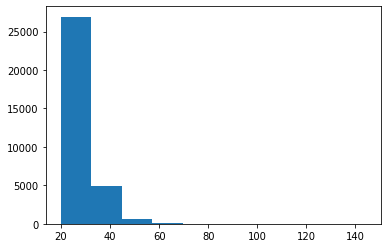

In [ ]:
# to detect the outliers we will plot histogram and see if zscore can be employed for detection of outliers
import matplotlib.pyplot as plt
plt.hist(loan_risk["person_age"]);


From the above plot we can see that it is skewed, hence zscore cannot be employed to find the outliers we will be using IQR method to find the outliers

In [ ]:
q1 = loan_risk["person_age"].quantile(.25)
q3 = loan_risk["person_age"].quantile(.75)
iqr=q3-q1
print (iqr)
upperlimit=iqr+1.5*q3
lowerlimit=iqr-1.5*q1
print (upperlimit)
print (lowerlimit)
outliers = loan_risk[(loan_risk["person_age"]>(q3+1.5*iqr))|(loan_risk["person_age"]<(q1-1.5*iqr))]
print ("total outliers", len(outliers))


7.0
52.0
-27.5
total outliers 1494


From the above output we see that there are a lot of outliers, and so we cannot remove them, as it would lead to a very high loss of data. Hence, we shall cap the outliers.

In [ ]:
# We will calculate new upper and lower limit and replace the values exceeding the limits, by the limits themselves 
newupperlimit=loan_risk["person_age"].mean()+3*(loan_risk["person_age"].std())
newlowerlimit=loan_risk["person_age"].mean()-3*(loan_risk["person_age"].std())
print(newupperlimit)
print(newlowerlimit)


46.77883517787463
8.690364662523145


In [ ]:
#applying the limits to the person_age column
import numpy as np
loan_risk["person_age"]=np.where(loan_risk["person_age"]>newupperlimit,newupperlimit,np.where(loan_risk["person_age"]<newlowerlimit,newlowerlimit,loan_risk["person_age"]))
loan_risk["person_age"].describe() # checking to see if the limits have been appplied

count    32581.000000
mean        27.619029
std          5.774188
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         46.778835
Name: person_age, dtype: float64

From the above ouput we see that the limits have been applied
We are going to do the same thing for the employment lenght column if the number of outliers are very high and capping the outliers is required.

(array([3.0072e+04, 1.5800e+03, 3.0000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0. ,  12.3,  24.6,  36.9,  49.2,  61.5,  73.8,  86.1,  98.4,
        110.7, 123. ]),
 <a list of 10 Patch objects>)

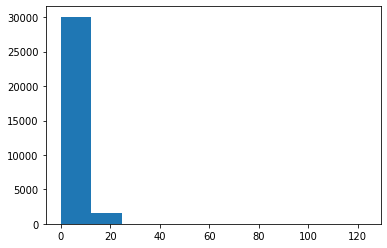

In [ ]:
import matplotlib.pyplot as plt
plt.hist(loan_risk["person_emp_length"])

Now again we see that the plot is skewed and we will not be able to apply zscore method and we need to apply the IQR method. 

In [ ]:
q1 = loan_risk["person_emp_length"].quantile(.25)
q3 = loan_risk["person_emp_length"].quantile(.75)
iqr=q3-q1
print (iqr)
upperlimit=iqr+1.5*q3
lowerlimit=iqr-1.5*q1
print (upperlimit)
print (lowerlimit)
outliers = loan_risk[(loan_risk["person_emp_length"]>(q3+1.5*iqr))|(loan_risk["person_emp_length"]<(q1-1.5*iqr))]
print ("total outliers", len(outliers))

5.0
15.5
2.0
total outliers 853


Again, there is a high number of values as ouliers, so instead of removing the outliers we shall cap them.

In [ ]:
# We will calculate new upper and lower limit and replace the values exceeding the limits, by the limits themselves 
newupperlimit=loan_risk["person_emp_length"].mean()+3*(loan_risk["person_emp_length"].std())
newlowerlimit=loan_risk["person_emp_length"].mean()-3*(loan_risk["person_emp_length"].std())
print(newupperlimit)
print(newlowerlimit)


17.21757674345114
-7.6382041498766915


In [ ]:
#applying the limits to the person_emp_length column

loan_risk["person_emp_length"]=np.where(loan_risk["person_emp_length"]>newupperlimit,newupperlimit,np.where(loan_risk["person_emp_length"]<newlowerlimit,newlowerlimit,loan_risk["person_emp_length"]))
loan_risk["person_emp_length"].describe() # checking to see if the limits have been appplied, it seems that the outliers have been capped

count    31686.000000
mean         4.750737
std          3.908415
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         17.217577
Name: person_emp_length, dtype: float64

##Dealing with missing values

In [ ]:
loan_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

As we now know the columns with missing values, we need to see how to handel them, in this case we cannot exclude them as a large number of data would be dropped, so we will try to fill the missing value with some number. We would be filling mean value

In [ ]:
loan_risk["person_emp_length"].fillna(loan_risk["person_emp_length"].mean(),inplace=True)
loan_risk["loan_int_rate"].fillna(loan_risk["loan_int_rate"].mean(),inplace=True)

In [ ]:
loan_risk.isnull().sum() # we can see that there is no null values now

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

##Tranforming categorical columns to numeric

We now have to transform object type columnns to numbers for analysis 

In [ ]:
# we shall use factorize funtion for conversion, loan_risk.select_dtypes(include=object).columns will give you all the object type columns
for i in loan_risk.select_dtypes(include=object).columns:
  loan_risk[i]=pd.factorize(loan_risk[i])[0]

In [ ]:
loan_risk.info() #so we have converted all the categorical variables to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  float64
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  int64  
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


##Splitting  the dataset for and normalizing it for the model

In [ ]:
x=loan_risk.drop(["loan_status"],axis=1)
y=loan_risk["loan_status"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=25) #using random sate to get the same values every time query is run and train:test ratio = .75:.25

We see from our dataset that all the columns carry different units and hence we need to bring them to similar scale ranging from zero to one

In [ ]:
xtrainnorm=pd.DataFrame(preprocessing.normalize(xtrain,axis=0),columns=xtrain.columns)
xtestnorm=pd.DataFrame(preprocessing.normalize(xtest,axis=0),columns=xtest.columns)

In [ ]:
xtrainnorm.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000,24435.000000
mean,0.006262,0.004522,0.004416,0.004971,0.005197,0.005471,0.005343,0.006160,0.005422,0.005808,0.005240
std,0.001311,0.004525,0.004629,0.004026,0.003730,0.003316,0.003518,0.001726,0.003395,0.002681,0.003669
min,0.004532,0.000273,0.000000,0.000000,0.000000,0.000000,0.000279,0.003031,0.000000,0.000000,0.001800
25%,0.005211,0.002624,0.000000,0.002092,0.002222,0.002912,0.002791,0.004748,0.002868,0.007046,0.002700
50%,0.005891,0.003759,0.000000,0.004184,0.004445,0.005824,0.004466,0.006158,0.004780,0.007046,0.003599
75%,0.006797,0.005399,0.009631,0.007322,0.008890,0.008735,0.006699,0.007331,0.007329,0.007046,0.007199
max,0.010599,0.410037,0.014446,0.018010,0.011112,0.017471,0.019537,0.012985,0.026448,0.007046,0.026996


In [ ]:
xtestnorm.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000
mean,0.010847,0.009012,0.007608,0.008586,0.009006,0.009459,0.009240,0.010672,0.009371,0.010044,0.009104
std,0.002258,0.006446,0.008055,0.007004,0.006455,0.005769,0.006114,0.002978,0.005912,0.004678,0.006315
min,0.007868,0.000575,0.000000,0.000000,0.000000,0.000000,0.000479,0.005259,0.000550,0.000000,0.003169
25%,0.009048,0.005342,0.000000,0.003619,0.003843,0.005058,0.004791,0.008072,0.004951,0.012222,0.004753
50%,0.010229,0.007534,0.000000,0.007238,0.007686,0.010116,0.007666,0.010684,0.008252,0.012222,0.006337
75%,0.011802,0.010958,0.016784,0.012666,0.015371,0.015174,0.011979,0.012720,0.012652,0.012222,0.012674
max,0.018403,0.123282,0.025176,0.031154,0.019214,0.030349,0.033540,0.020239,0.042358,0.012222,0.047528


Our xtest and xtrain variables are normalized and we can see that all the values are between 0 and 1

##Logistic Regression model

In [ ]:
#Logistic Regression model and predicting ytest values
m=LogisticRegression(random_state=1)
m.fit(xtrainnorm,ytrain)
ypred=m.predict(xtestnorm)

In [ ]:
#priting accouracy ,recall and other metrices
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6330
           1       0.00      0.00      0.00      1816

    accuracy                           0.78      8146
   macro avg       0.39      0.50      0.44      8146
weighted avg       0.60      0.78      0.68      8146



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


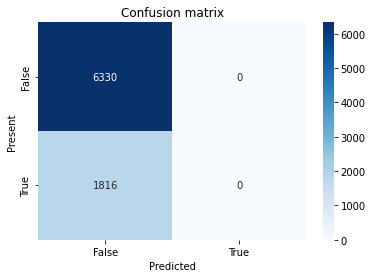

In [ ]:
#confusion matrix
confusion = confusion_matrix(ytest,ypred)
cgraph=sns.heatmap(confusion,annot=True,fmt='.0f',cmap='Blues',xticklabels=['False','True'],yticklabels=['False','True'])
cgraph.set_title("Confusion matrix")
cgraph.set_xlabel("Predicted")
cgraph.set_ylabel("Present")
plt.show()

From the above confusion matrix we see that even if the accuracy of the model is 78% our model is predicting that all the output as 0 and it fails to predict any 1's. This is due to a case that we had seen earlier that our target variable is imbalanced.


##SMOTE over sampling

In [ ]:
#prediction using oversampling method
sm=SMOTE(random_state=2)
xover,yover=sm.fit_resample(xtrainnorm,ytrain)

In [ ]:
#count of 0 and 1 before over sampling
ytrain.value_counts()

0    19143
1     5292
Name: loan_status, dtype: int64

In [ ]:
#count of 0 and 1 after over sampling
yover.value_counts()

0    19143
1    19143
Name: loan_status, dtype: int64

In [ ]:
#applying the over sample data to logistic regression
m.fit(xover,yover)
ypred=m.predict(xtestnorm)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      6330
           1       0.40      0.75      0.52      1816

    accuracy                           0.69      8146
   macro avg       0.65      0.71      0.65      8146
weighted avg       0.79      0.69      0.72      8146



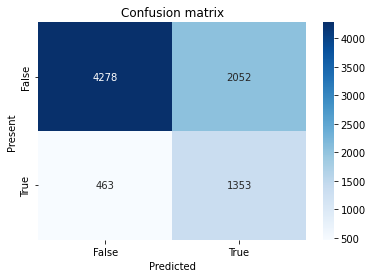

In [ ]:
confusion = confusion_matrix(ytest,ypred)
cgraph=sns.heatmap(confusion,annot=True,fmt='.0f',cmap='Blues',xticklabels=['False','True'],yticklabels=['False','True'])
cgraph.set_title("Confusion matrix")
cgraph.set_xlabel("Predicted")
cgraph.set_ylabel("Present")
plt.show()

Though our accuracy dropped, which was expected, our recall vaue for the minority classification 1 has increased very much and hence this model is reliable.

##NearMiss undersampling

In [ ]:
#prediction using undersampling method
nm=NearMiss()
xunder,yunder=nm.fit_resample(xtrainnorm,ytrain)

In [ ]:
#count of 0 and 1 before undersampling sampling
ytrain.value_counts()

0    19143
1     5292
Name: loan_status, dtype: int64

In [ ]:
#count of 0 and 1 after undersampling sampling
yunder.value_counts()

0    5292
1    5292
Name: loan_status, dtype: int64

In [ ]:
#applying the over sample data to logistic regression
m.fit(xunder,yunder)
ypred=m.predict(xtestnorm)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.23      0.37      6330
           1       0.26      0.94      0.40      1816

    accuracy                           0.39      8146
   macro avg       0.59      0.58      0.38      8146
weighted avg       0.78      0.39      0.37      8146



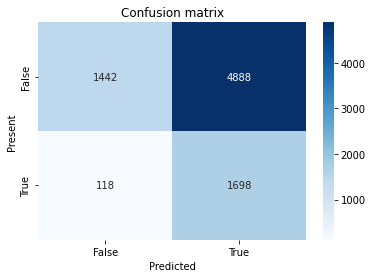

In [ ]:
confusion = confusion_matrix(ytest,ypred)
cgraph=sns.heatmap(confusion,annot=True,fmt='.0f',cmap='Blues',xticklabels=['False','True'],yticklabels=['False','True'])
cgraph.set_title("Confusion matrix")
cgraph.set_xlabel("Predicted")
cgraph.set_ylabel("Present")
plt.show()

We see that our accuracy is very bad 39% but our recall for minority class is very high 1, bit the majority class is ignored 23%. This model cannot be considered, we will be considering oversampled method where we had better accuracy